<a href="https://colab.research.google.com/github/riddhisidana/Riddhi-Sidana-23322023/blob/main/Copy_of_1500_Games_%7C_Steam_%7C_Revenue_%7C_Detailed_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Collection**

**1.1 - Importing File formats**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Importing CSV file
df = pd.read_csv('/content/Steam_2024_bestRevenue_1500 (1).csv')

**1.21 - Checking Data Types**

In [ ]:
data_types = df.dtypes
print(data_types)

name               object
releaseDate        object
copiesSold          int64
price             float64
revenue           float64
avgPlaytime       float64
reviewScore         int64
publisherClass     object
publishers         object
developers         object
steamId             int64
dtype: object


**1.22 - Checking Duplicates**

In [ ]:
duplicates = df.duplicated().sum()
print(f'Total Duplicates: {duplicates}')

Total Duplicates: 0


# **2. Data Exploration**

**2.1 - Understanding the Structure**

**2.11 - View the First Few Rows**

In [ ]:
df.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


**2.12 - View DataFrame Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1500 non-null   object 
 1   releaseDate     1500 non-null   object 
 2   copiesSold      1500 non-null   int64  
 3   price           1500 non-null   float64
 4   revenue         1500 non-null   float64
 5   avgPlaytime     1500 non-null   float64
 6   reviewScore     1500 non-null   int64  
 7   publisherClass  1500 non-null   object 
 8   publishers      1499 non-null   object 
 9   developers      1498 non-null   object 
 10  steamId         1500 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB


**2.13 - Summary Statistics**

In [ ]:
df.describe()

,copiesSold,price,revenue,avgPlaytime,reviewScore,steamId
count,1.500000e+03,1500.000000,1.500000e+03,1500.000000,1500.000000,1.500000e+03
mean,1.414826e+05,17.519513,2.632382e+06,12.562704,76.201333,2.183788e+06
std,1.132757e+06,12.646612,2.781024e+07,21.542173,24.319438,6.067725e+05
min,5.930000e+02,0.000000,2.067400e+04,0.000000,0.000000,2.488000e+04
25%,4.918750e+03,9.990000,4.550425e+04,3.564848,72.000000,1.792795e+06
50%,1.192850e+04,14.990000,1.090530e+05,6.762776,83.000000,2.321985e+06
75%,3.786975e+04,19.990000,4.551568e+05,13.104473,92.000000,2.693228e+06
max,3.073915e+07,99.990000,8.377934e+08,296.332852,100.000000,3.107330e+06


**2.14 - View Column Names**

In [ ]:
df.columns

Index(['name', 'releaseDate', 'copiesSold', 'price', 'revenue', 'avgPlaytime',
       'reviewScore', 'publisherClass', 'publishers', 'developers', 'steamId'],
      dtype='object')

**2.15 - Shape of the Data**

In [ ]:
df.shape

(1500, 11)

**2.2 - Missing Values**

**2.21 - Identifying Missing Values**

In [ ]:
df.isnull().sum()

,0
name,0
releaseDate,0
copiesSold,0
price,0
revenue,0
avgPlaytime,0
reviewScore,0
publisherClass,0
publishers,1
developers,2


**2.22 - Dropping Row or Columns with Missing Values**

In [ ]:
df_cleaned = df.dropna()
df_cleaned_columns = df.dropna(axis=1)

# **3. Data Cleaning**

In [ ]:
# Calculating Z-scores of each value in the DataFrame for numerical columns
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
# Identifying outliers (Z-score > 3 or < -3)
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print(f'Outliers detected: {df_outliers.shape[0]}')

Outliers detected: 167


**3.2 - Remove Outliers**

In [ ]:
df_no_outliers = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]
print(f'Data shape after removing outliers: {df_no_outliers.shape}')

Data shape after removing outliers: (1333, 11)


# **UNIVARIATE ANALYSIS**

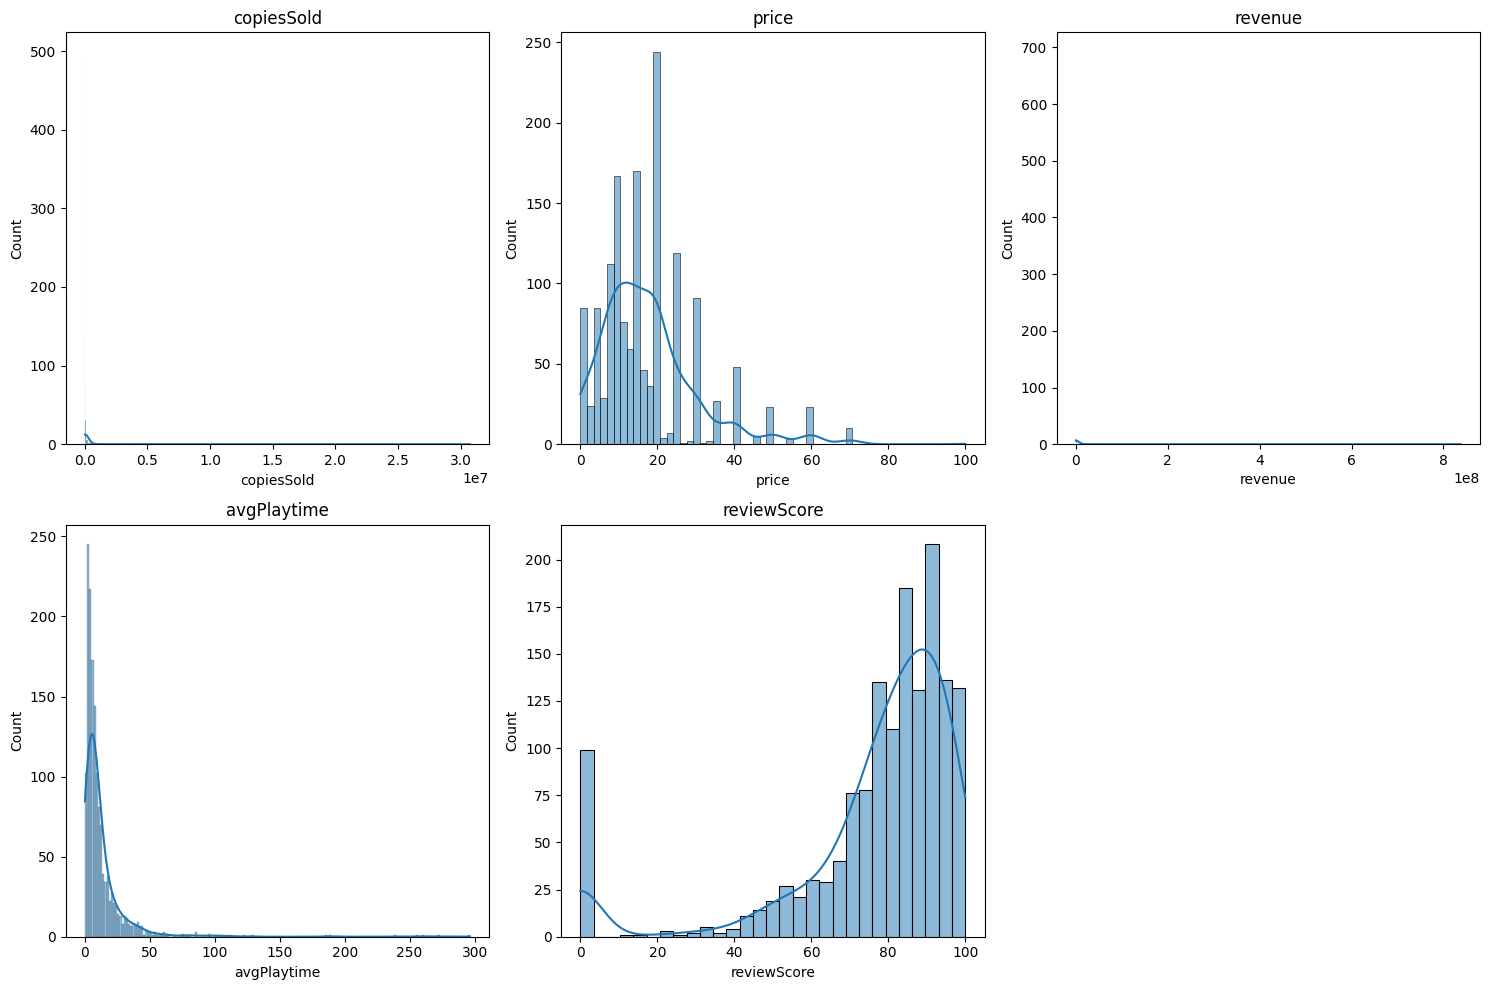

In [ ]:
numerical_columns = ['copiesSold', 'price', 'revenue', 'avgPlaytime', 'reviewScore']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

**What is the distribution of review scores?**

In [ ]:
import plotly.express as px
fig = px.histogram(df, x='reviewScore', nbins=20, title='Distribution of Review Scores')
fig.show()

Based on the univariate analysis, here are some key insights:

1.Copies Sold: Highly skewed distribution with a mean of 141,483 and median of 11,929, indicating a few games with extremely high sales.

2.Price: Average price is $17.52.

3.Revenue: Extremely skewed, with mean revenue of 2,632,382 and  median of $109,053.

4.Average Playtime: Mean of 12.56 hours, but with high variability (std dev of 21.54 hours).

5.Review Score: Mean score of 76.20, with a relatively normal distribution.

#**MULTIVARIATE ANALYSIS**

**Label encoding to convert non numerical variables into numeric data**

In [ ]:
df2 = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['name', 'releaseDate', 'publisherClass', 'publishers', 'developers']
for column in categorical_columns:
    df2[column] = label_encoder.fit_transform(df[column])
print(df2.head())

   name  releaseDate  copiesSold  price    revenue  avgPlaytime  reviewScore  \
0  1386           51      165301  99.99  8055097.0    42.365140           71   
1   363          192      159806  59.99  7882151.0    29.651061           57   
2  1096          116      214192  49.99  7815247.0    12.452593           88   
3   660          106      440998  19.99  7756399.0    24.797817           76   
4  1082           99      141306  59.99  7629252.0    34.258496           96   

   publisherClass  publishers  developers  steamId  
0               1           8        1224  2315690  
1               3         201         976  2291060  
2               3         895         562  1575940  
3               3         714         818  1859910  
4               0         819          34  1875830  


**What are the correlations between key variables?**

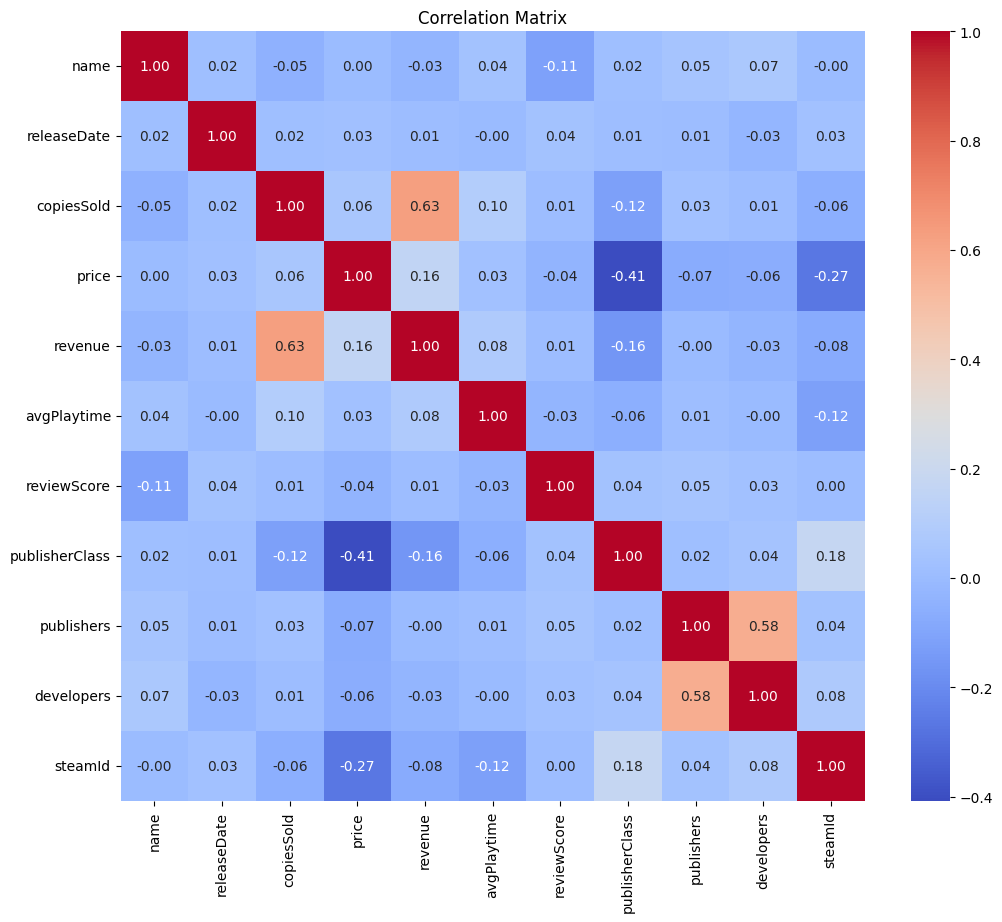

In [ ]:
correlation_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

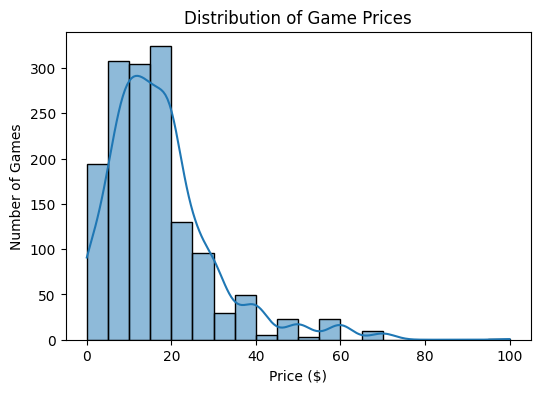

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['price'],bins=20,kde=True,edgecolor="black")
plt.title("Distribution of Game Prices")
plt.xlabel("Price ($)")
plt.ylabel('Number of Games')
plt.show()

**What are the top 10 publishers by the number of games published?**

In [ ]:
top_publishers = df['publishers'].value_counts().nlargest(10)
fig = px.bar(top_publishers, x=top_publishers.index, y=top_publishers.values,
             title='Top 10 Publishers by Number of Games Published',
             labels={'x': 'Publisher', 'y': 'Number of Games'})
fig.show()

**What is the average playtime for different publishers?**

In [ ]:
avg_playtime_publishers = df.groupby('publishers')['avgPlaytime'].mean().nlargest(10)
fig = px.bar(avg_playtime_publishers, x=avg_playtime_publishers.index, y=avg_playtime_publishers.values,
             title='Average Playtime for Top 10 Publishers',
             labels={'x': 'Publisher', 'y': 'Average Playtime (hours)'})
fig.show()

**What are the top 10 most popular developers by the number of games developed?**

In [ ]:
top_developers = df['developers'].value_counts().nlargest(10)
fig = px.bar(top_developers, x=top_developers.index, y=top_developers.values,
             title='Top 10 Developers by Number of Games Developed',
             labels={'x': 'Developers', 'y': 'Number of Games'})
fig.show()

**How is the revenue distributed across different price ranges?**

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='price', y='revenue', title='Revenue vs Price of Games',
                 labels={'price': 'Price of Game ($)', 'revenue': 'Revenue Generated ($)'})
fig.show()

**How does the number of copies sold correlate with revenue?**

In [ ]:
fig = px.scatter(df, x='copiesSold', y='revenue', title='Copies Sold vs Revenue',
                 labels={'copiesSold': 'Copies Sold', 'revenue': 'Revenue ($)'})
fig.show()

**What is the relationship between the price of games and their average playtime?**

In [ ]:
fig = px.scatter(df, x='price', y='avgPlaytime', title='Price vs Average Playtime of Games',
                 labels={'price': 'Price ($)', 'avgPlaytime': 'Average Playtime (hours)'})
fig.show()

**How do game revenues compare across different publisher classes?**

In [ ]:
fig = px.box(df, x='publisherClass', y='revenue', title='Revenue Distribution by Publisher Class',
             labels={'publisherClass': 'Publisher Class', 'revenue': 'Revenue ($)'})
fig.show()

**What is the distribution of the number of copies sold?**

In [ ]:
fig = px.histogram(df, x='copiesSold', nbins=20, title='Distribution of Copies Sold',
                   labels={'copiesSold': 'Number of Copies Sold'})
fig.show()

**What are the top 5 games by revenue?**

In [ ]:
top_games_revenue = df.nlargest(5, 'revenue')[['name', 'revenue']]
fig = px.bar(top_games_revenue, x='name', y='revenue', title='Top 5 Games by Revenue',
             labels={'name': 'Game Name', 'revenue': 'Revenue ($)'})
fig.show()

**How does the number of copies sold vary across different review scores?**

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='reviewScore', y='copiesSold', title='Review Score vs Copies Sold',
                 labels={'reviewScore': 'Review Score', 'copiesSold': 'Copies Sold'})
fig.show()

**How does average playtime vary with the review score?**

In [ ]:
fig = px.scatter(df, x='reviewScore', y='avgPlaytime', title='Review Score vs Average Playtime',
                 labels={'reviewScore': 'Review Score', 'avgPlaytime': 'Average Playtime (hours)'})
fig.show()

**How do game prices vary across different publisher classes?**

In [ ]:
fig = px.box(df, x='publisherClass', y='price', title='Price Distribution by Publisher Class',
             labels={'publisherClass': 'Publisher Class', 'price': 'Price ($)'})
fig.show()

**Which publishers generate the highest average revenue per game?**

In [ ]:
avg_revenue_publishers = df.groupby('publishers')['revenue'].mean().nlargest(10)
fig = px.bar(avg_revenue_publishers, x=avg_revenue_publishers.index, y=avg_revenue_publishers.values,
             title='Top 10 Publishers by Average Revenue per Game',
             labels={'x': 'Publisher', 'y': 'Average Revenue ($)'})
fig.show()

**What is the relationship between game playtime and review score distribution across price tiers?**

In [ ]:
# Creating price tiers based on quantiles
df['price_tier'] = pd.qcut(df['price'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Scatter plot for playtime vs review score across price tiers
fig = px.scatter(df, x='avgPlaytime', y='reviewScore', color='price_tier',
                 title='Average Playtime vs Review Score Across Price Tiers',
                 labels={'avgPlaytime': 'Average Playtime (hours)', 'reviewScore': 'Review Score'})
fig.show()

**Which games have the highest average playtime but lowest revenue?**

In [ ]:
high_playtime_low_revenue = df[(df['avgPlaytime'] > df['avgPlaytime'].quantile(0.75)) &
                               (df['revenue'] < df['revenue'].quantile(0.25))]

fig = px.scatter(high_playtime_low_revenue, x='avgPlaytime', y='revenue', text='name',
                 title='Games with High Playtime and Low Revenue',
                 labels={'avgPlaytime': 'Average Playtime (hours)', 'revenue': 'Revenue ($)'})
fig.show()

**How do average playtime and revenue vary with the release year?**

In [ ]:
# Extracting release year from the 'releaseDate' column
df['releaseYear'] = pd.to_datetime(df['releaseDate'], format='%d-%m-%Y').dt.year

# Aggregating average playtime and revenue by release year
playtime_by_year = df.groupby('releaseYear')['avgPlaytime'].mean()
revenue_by_year = df.groupby('releaseYear')['revenue'].mean()

# Plotting the two trends on a single graph
fig = px.line(x=playtime_by_year.index, y=playtime_by_year.values, title='Average Playtime and Revenue Over the Years',
              labels={'x': 'Release Year', 'y': 'Value'}, markers=True)
fig.add_scatter(x=revenue_by_year.index, y=revenue_by_year.values, mode='lines+markers', name='Revenue')

fig.update_layout(legend_title_text='Metric')
fig.show()

**What are the most frequent review scores in the dataset?**

In [ ]:
fig = px.histogram(df, x='reviewScore', nbins=20, title='Distribution of Review Scores',
                   labels={'reviewScore': 'Review Score'})
fig.show()

**How do the top 5 developers compare in terms of total revenue?**

In [ ]:
top_5_developers_revenue = df.groupby('developers')['revenue'].sum().nlargest(5)

fig = px.bar(top_5_developers_revenue, x=top_5_developers_revenue.index, y=top_5_developers_revenue.values,
             title='Top 5 Developers by Total Revenue',
             labels={'x': 'Developer', 'y': 'Total Revenue ($)'})
fig.show()

**How does the number of copies sold correlate with the price?**

In [ ]:
fig = px.scatter(df, x='price', y='copiesSold', title='Price vs Copies Sold',
                 labels={'price': 'Price ($)', 'copiesSold': 'Number of Copies Sold'})
fig.show()

**What are the top 10 games by average playtime?**

In [ ]:
top_10_playtime_games = df.nlargest(10, 'avgPlaytime')[['name', 'avgPlaytime']]

fig = px.bar(top_10_playtime_games, x='name', y='avgPlaytime',
             title='Top 10 Games by Average Playtime',
             labels={'name': 'Game Name', 'avgPlaytime': 'Average Playtime (hours)'})
fig.show()

**Is there any correlation between review score and revenue?**

In [ ]:
fig = px.scatter(df, x='reviewScore', y='revenue', title='Review Score vs Revenue',
                 labels={'reviewScore': 'Review Score', 'revenue': 'Revenue ($)'})
fig.show()

**How do the top publishers perform in terms of total copies sold?**

In [ ]:
top_publishers_copies_sold = df.groupby('publishers')['copiesSold'].sum().nlargest(10)

fig = px.bar(top_publishers_copies_sold, x=top_publishers_copies_sold.index, y=top_publishers_copies_sold.values,
             title='Top 10 Publishers by Total Copies Sold',
             labels={'x': 'Publisher', 'y': 'Total Copies Sold'})
fig.show()

**What is the distribution of game prices?**

In [ ]:
fig = px.histogram(df, x='price', nbins=30, title='Distribution of Game Prices',
                   labels={'price': 'Price ($)'})
fig.show()

**How do the number of copies sold vary by publisher class?**

In [ ]:
fig = px.scatter(df, x='publisherClass', y='copiesSold', title='Copies Sold by Publisher Class',
                 labels={'publisherClass': 'Publisher Class', 'copiesSold': 'Copies Sold'},
                 color='publisherClass', size='copiesSold', hover_name='name')
fig.show()

**How do review score varies with Publisher class?**


<ipython-input-188-478fe1685a77>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




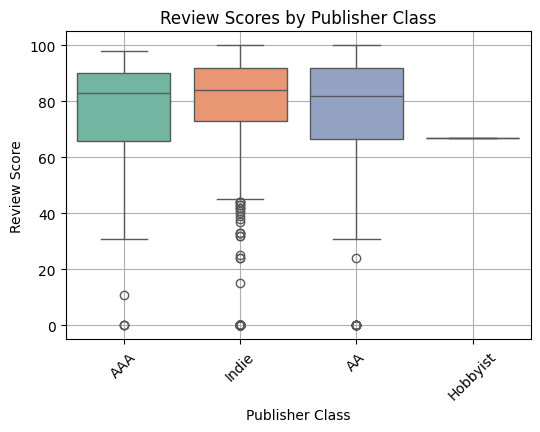

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='publisherClass', y='reviewScore', palette='Set2')
plt.title('Review Scores by Publisher Class')
plt.xlabel('Publisher Class')
plt.ylabel('Review Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**How does average playtime vary with publisher class?**

<Axes: xlabel='reviewScore', ylabel='avgPlaytime'>

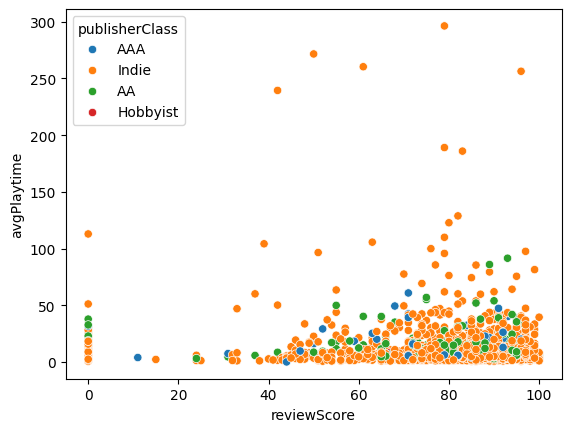

In [ ]:
sns.scatterplot(data=df, x='reviewScore', y='avgPlaytime', hue='publisherClass')

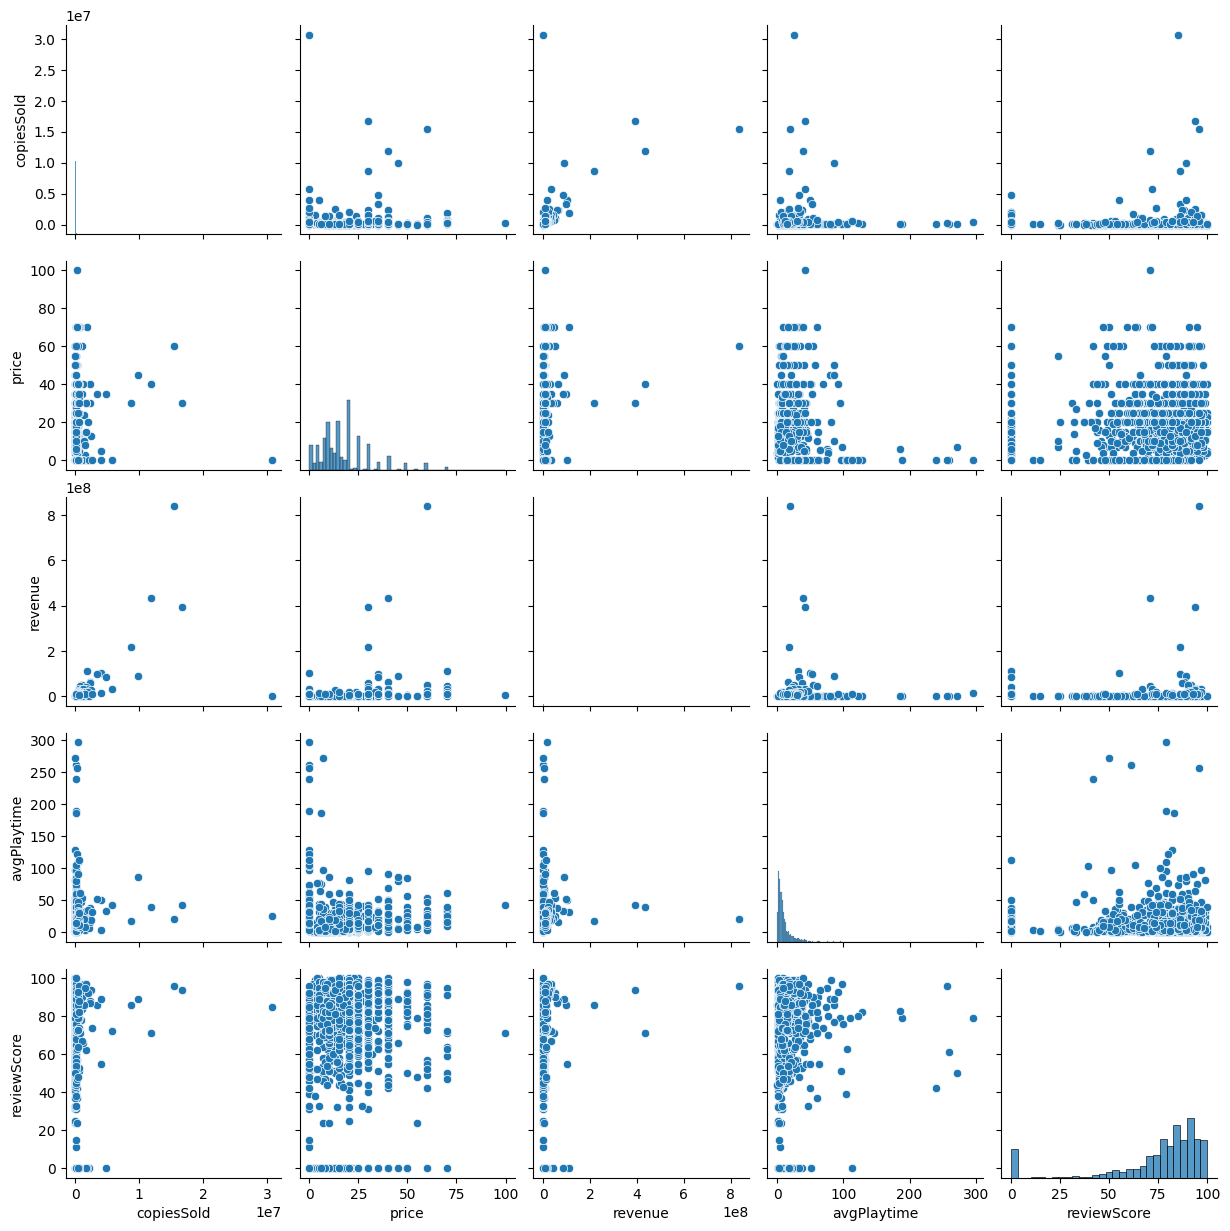

In [ ]:
sns.pairplot(df[['copiesSold', 'price', 'revenue', 'avgPlaytime', 'reviewScore']])

We can clearly see that there is a :

Confirmed the strong linear relationship between copies sold and revenue



Price and revenue show a positive trend, but with more variability

Review score has a slight positive impact on copies sold

No clear relationship between average playtime and review score
Principal Component Analysis:

<Axes: title={'center': 'Revenue Over Time'}, xlabel='releaseDate'>

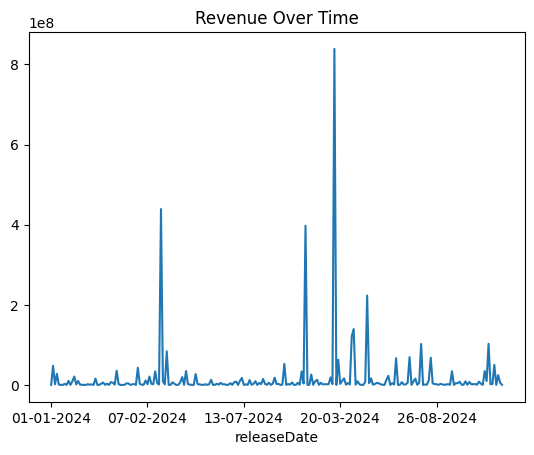

In [ ]:
df.groupby('releaseDate')['revenue'].sum().plot(kind='line', title='Revenue Over Time')